In [1]:
import matplotlib.pyplot as plt

import numpy as np

import os
import sys

import yaml

notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)
sys.path.append(project_root)

from modules.analyzers import *
from helpers.read_tar_parquet_to_df import process_parquet_files_from_tar

colors ={'ch1':'tab:blue','ch2':'tab:orange'}

In [2]:
with open('../config/config.yaml', 'r') as file:
    config_dict = yaml.safe_load(file)
config_dict = config_dict['analyzer']

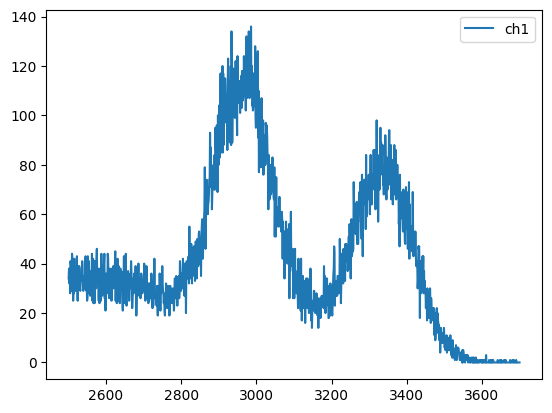

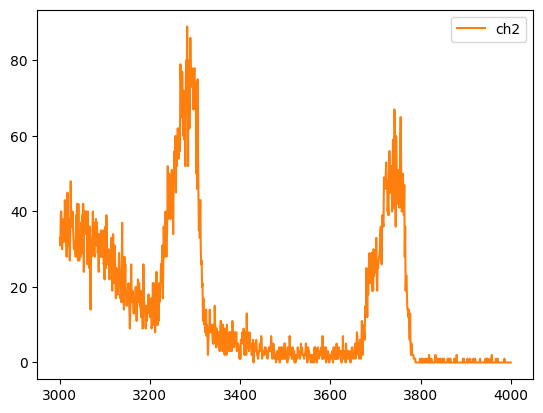

In [3]:
hist_x = np.linspace(0,4096,4096)
hist_Ge = np.loadtxt('coincidence/histogram-Ge.hst')
hist_Na = np.loadtxt('coincidence/histogram-NaId.hst')

a=2500
b=3700
plt.plot(hist_x[a:b],hist_Ge[a:b],colors['ch1'],label='ch1')
plt.legend()
plt.show()
a=3000
b=4000
plt.plot(hist_x[a:b],hist_Na[a:b],colors['ch2'],label='ch2')
plt.legend()
plt.show()

In [7]:
path="../measurements/coincidence/"
# Path to your tar file
tar_path = path+'trigger/spectrum.tar'

pulse_height_pavel_config = config_dict['pulse_height_pavel_config']

heights1=[]
heights2=[]
DeltaTs=[]

def work_on_arr(input_data):
    peaks,peaks_prop = pulse_height_pavel(input_data, pulse_height_pavel_config)
    if peaks_prop is not None:
        height1=peaks_prop['ch1']['height'][0]
        height2=peaks_prop['ch2']['height'][0]
        DeltaT=int(peaks['ch1'][0]-peaks['ch2'][0])
        save=False
        if not(1000<height1<40000 and 1000<height2<40000):
            return
        
        heights1.append(height1)
        heights2.append(height2)
        DeltaTs.append(DeltaT)
    
    
    


process_parquet_files_from_tar(tar_path,work_on_arr,verbose=True)

Processing spectrum_3.parquet
Processing spectrum_30.parquet
Processing spectrum_32.parquet
Processing spectrum_38.parquet
Processing spectrum_42.parquet
Processing spectrum_46.parquet
Processing spectrum_52.parquet
Processing spectrum_56.parquet
Processing spectrum_60.parquet
Processing spectrum_64.parquet
Processing spectrum_68.parquet
Processing spectrum_72.parquet
Processing spectrum_76.parquet
Processing spectrum_80.parquet
Processing spectrum_84.parquet
Processing spectrum_88.parquet
Processing spectrum_92.parquet
Processing spectrum_96.parquet
Processing spectrum_100.parquet
Processing spectrum_104.parquet
Processing spectrum_108.parquet
Processing spectrum_112.parquet
Processing spectrum_116.parquet
Processing spectrum_120.parquet
Processing spectrum_124.parquet
Processing spectrum_128.parquet
Processing spectrum_130.parquet
Processing spectrum_134.parquet
Processing spectrum_138.parquet
Processing spectrum_142.parquet
Processing spectrum_146.parquet
Processing spectrum_152.par

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

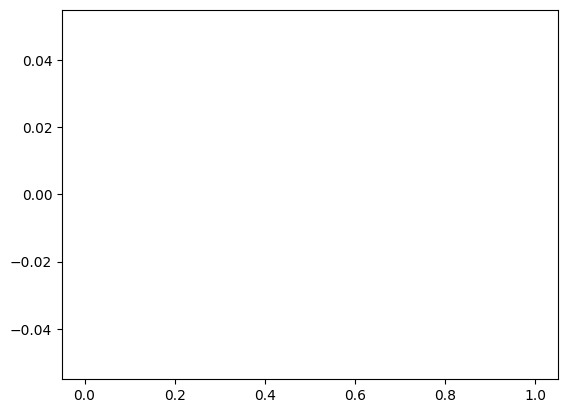

In [6]:
nbins=50
plt.hist(heights1,color=colors['ch1'],bins=nbins)
plt.hist(heights2,color=colors['ch2'],bins=nbins)
plt.show()

In [ ]:
len(heights1)

150